In [13]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
# Load CSV File
listings = pd.read_csv('listings-masters-modeling.csv', error_bad_lines = False)
listings.head()

,id,listing_url,name,description,picture_url,hostid,host_since,host_response_time,host_response_rate,host_acceptance_rate,superhost,host_listings_count,host_identity_verified,neighbourhoodid,borough_id,latitude,longitude,room_typeid,accommodates,bathrooms_text,bathrooms,bedrooms,beds,amenities,amenities_count,Kitchen,Heating,Essentials,Air Conditioning,TV,Washer,Dryer,Iron,Parking,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,2595,https://www.airbnb.com/rooms/2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",https://a0.muscache.com/pictures/f0813a11-40b2...,2845,9/9/2008,within a few hours,0.92,0.25,0.0,6.0,1.0,115,3,40.75362,-73.98377,1,2,1 bath,1.0,NaN,1.0,"[""Hot water"", ""Extra pillows and blankets"", ""O...",31,1,1,1,1,1,0,1,1,1,175,30,1125,30,60,90,365,48,94.0,9.0,9.0,10.0,10.0,9.0,0
1,3831,https://www.airbnb.com/rooms/3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,12/7/2008,within an hour,0.95,0.93,0.0,1.0,1.0,63,2,40.68514,-73.95976,1,3,1 bath,1.0,1.0,3.0,"[""Hot water"", ""Shampoo"", ""Baby safety gates"", ...",35,1,1,1,1,1,0,1,1,1,74,1,730,12,31,61,307,375,89.0,9.0,9.0,9.0,10.0,10.0,0
2,5121,https://www.airbnb.com/rooms/5121,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,https://a0.muscache.com/pictures/2090980c-b68e...,7356,2/3/2009,,0.00,0.00,0.0,1.0,1.0,52,2,40.68688,-73.95596,2,2,NaN,NaN,1.0,1.0,"[""Wifi"", ""Kitchen"", ""Heating"", ""Air conditioni...",4,1,1,0,1,0,0,0,0,0,60,30,730,30,60,90,365,50,90.0,8.0,8.0,10.0,9.0,9.0,0
3,5178,https://www.airbnb.com/rooms/5178,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,https://a0.muscache.com/pictures/12065/f070997...,8967,3/3/2009,within a day,1.00,1.00,0.0,1.0,0.0,115,3,40.76468,-73.98315,2,2,1 bath,1.0,1.0,1.0,"[""Wifi"", ""Heating"", ""Refrigerator"", ""Shampoo"",...",18,0,1,1,1,1,0,1,1,1,65,2,14,0,0,0,0,474,84.0,9.0,8.0,9.0,10.0,9.0,0
4,279857,https://www.airbnb.com/rooms/279857,Entire Home w 8 BR /5 Bath No share Yellow Block,As seen on The Net Flix Show Stay Here Show 4 ...,https://a0.muscache.com/pictures/4b888435-e2ea...,1420300,11/18/2011,within an hour,1.00,0.96,1.0,1.0,1.0,52,2,40.68492,-73.95489,2,16,5 baths,5.0,8.0,18.0,"[""Hot water"", ""Crib"", ""Shampoo"", ""Oven"", ""Extr...",45,1,1,1,1,1,1,1,1,1,650,1,29,25,55,85,347,140,97.0,10.0,10.0,10.0,10.0,10.0,1


In [15]:
listings.columns

Index(['id', 'listing_url', 'name', 'description', 'picture_url', 'hostid',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'superhost', 'host_listings_count',
       'host_identity_verified', 'neighbourhoodid', 'borough_id', 'latitude',
       'longitude', 'room_typeid', 'accommodates', 'bathrooms_text',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'amenities_count',
       'Kitchen', 'Heating', 'Essentials', 'Air Conditioning', 'TV', 'Washer',
       'Dryer', 'Iron', 'Parking', 'price', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

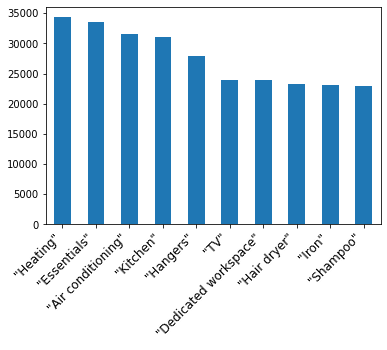

In [16]:
pd.Series(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(10)\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

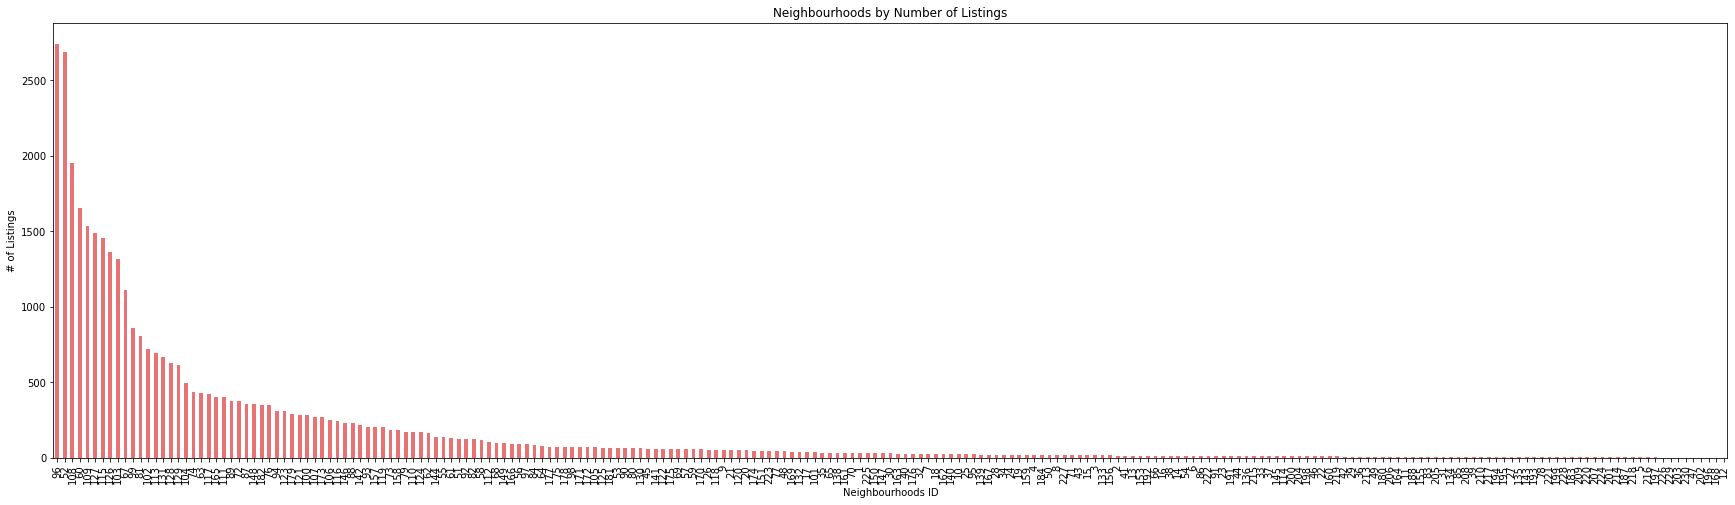

In [17]:

count_per_neighbourhood = listings['neighbourhoodid'].value_counts()
ax = count_per_neighbourhood.plot(kind='bar', figsize = (30,8), color = '#E35A5C', alpha = 0.85)
ax.set_title("Neighbourhoods by Number of Listings")
ax.set_xlabel("Neighbourhoods ID")
ax.set_ylabel("# of Listings")
plt.show()

In [18]:
relevant_neighbourhoods = count_per_neighbourhood[count_per_neighbourhood > 100].index
listings_cleaned = listings[listings['neighbourhoodid'].isin(relevant_neighbourhoods)]

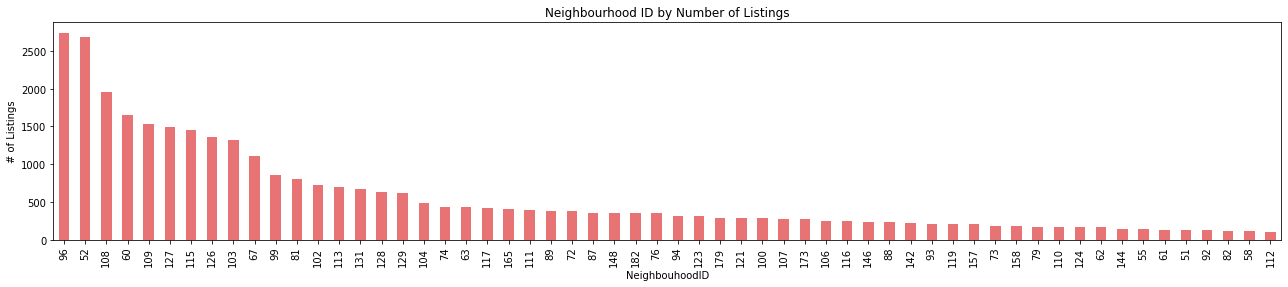

Number of entries removed:  4042


In [19]:
# Plot new zipcodes distribution
count_per_neighbourhood = listings_cleaned ['neighbourhoodid'].value_counts()
ax = count_per_neighbourhood.plot(kind='bar', figsize = (22,4), color = '#E35A5C', alpha = 0.85)
ax.set_title("Neighbourhood ID by Number of Listings")
ax.set_xlabel("NeighbouhoodID")
ax.set_ylabel("# of Listings")

plt.show()

print('Number of entries removed: ', listings.shape[0] - listings_cleaned.shape[0])

In [20]:
listings_cleaned=listings_cleaned.fillna(listings_cleaned.mean())

In [21]:
listings_cleaned = listings_cleaned.loc[(listings_cleaned.price <= 600)]

In [22]:
listings_cleaned.columns

Index(['id', 'listing_url', 'name', 'description', 'picture_url', 'hostid',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'superhost', 'host_listings_count',
       'host_identity_verified', 'neighbourhoodid', 'borough_id', 'latitude',
       'longitude', 'room_typeid', 'accommodates', 'bathrooms_text',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'amenities_count',
       'Kitchen', 'Heating', 'Essentials', 'Air Conditioning', 'TV', 'Washer',
       'Dryer', 'Iron', 'Parking', 'price', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

In [23]:
listings_cleaned = listings_cleaned[['neighbourhoodid','superhost', 'host_identity_verified', 'host_listings_count', 'room_typeid', 'accommodates', 'amenities_count','bathrooms', 'bedrooms', 'beds', 'Heating', 'Essentials', 'Kitchen', 'Air Conditioning', 'Washer', 'Dryer', 'Parking','minimum_nights','number_of_reviews', 'review_scores_rating','price']]


In [24]:
listings_cleaned

,neighbourhoodid,superhost,host_identity_verified,host_listings_count,room_typeid,accommodates,amenities_count,bathrooms,bedrooms,beds,Heating,Essentials,Kitchen,Air Conditioning,Washer,Dryer,Parking,minimum_nights,number_of_reviews,review_scores_rating,price
0,115,0.0,1.0,6.0,1,2,31,1.000000,1.308454,1.0,1,1,1,1,0,1,1,30,48,94.000000,175
1,63,0.0,1.0,1.0,1,3,35,1.000000,1.000000,3.0,1,1,1,1,0,1,1,1,375,89.000000,74
2,52,0.0,1.0,1.0,2,2,4,1.164436,1.000000,1.0,1,0,1,1,0,0,0,30,50,90.000000,60
3,115,0.0,0.0,1.0,2,2,18,1.000000,1.000000,1.0,1,1,0,1,0,1,1,2,474,84.000000,65
5,127,0.0,1.0,1.0,2,1,16,1.000000,1.000000,1.0,1,1,0,1,0,1,1,2,118,98.000000,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36918,111,0.0,1.0,10.0,1,2,30,1.000000,1.308454,1.0,1,1,1,1,1,1,1,30,0,93.816601,199
36919,127,0.0,1.0,0.0,1,3,16,1.000000,1.000000,1.0,1,1,1,1,1,1,0,30,0,93.816601,205
36920,102,1.0,1.0,0.0,4,1,10,1.000000,1.000000,0.0,1,1,0,1,0,1,0,1,0,93.816601,35
36921,111,0.0,1.0,1.0,1,2,18,1.000000,1.000000,1.0,1,1,1,1,0,1,0,4,0,93.816601,295


In [29]:
temp_scores = temp[['accommodates', 'amenities_count', 'bathrooms', 'bedrooms', 'beds', 'Heating', 'Air Conditioning', 'Washer', 'Dryer', 'price']]
temp_scores 

,accommodates,amenities_count,bathrooms,bedrooms,beds,Heating,Air Conditioning,Washer,Dryer,price
0,2,31,1.000000,1.308454,1.0,1,1,0,1,175
1,3,35,1.000000,1.000000,3.0,1,1,0,1,74
2,2,4,1.164436,1.000000,1.0,1,1,0,0,60
3,2,18,1.000000,1.000000,1.0,1,1,0,1,65
5,1,16,1.000000,1.000000,1.0,1,1,0,1,75
...,...,...,...,...,...,...,...,...,...,...
36918,2,30,1.000000,1.308454,1.0,1,1,1,1,199
36919,3,16,1.000000,1.000000,1.0,1,1,1,1,205
36920,1,10,1.000000,1.000000,0.0,1,1,0,1,35
36921,2,18,1.000000,1.000000,1.0,1,1,0,1,295


In [30]:
corr_matrix = temp_scores.corr()

corr_matrix

,accommodates,amenities_count,bathrooms,bedrooms,beds,Heating,Air Conditioning,Washer,Dryer,price
accommodates,1.000000,0.237597,0.264915,0.684999,0.716866,0.071406,0.140514,0.141730,0.148593,0.513151
amenities_count,0.237597,1.000000,0.110765,0.150886,0.216437,0.229687,0.277956,0.348811,0.455108,0.154083
bathrooms,0.264915,0.110765,1.000000,0.364240,0.290856,0.024614,0.045168,0.163114,0.093740,0.201976
bedrooms,0.684999,0.150886,0.364240,1.000000,0.670238,0.043287,0.085575,0.125706,0.091665,0.438901
beds,0.716866,0.216437,0.290856,0.670238,1.000000,0.054441,0.105115,0.107236,0.120943,0.377585
Heating,0.071406,0.229687,0.024614,0.043287,0.054441,1.000000,0.219761,0.076149,0.167596,0.036203
Air Conditioning,0.140514,0.277956,0.045168,0.085575,0.105115,0.219761,1.000000,0.156336,0.251583,0.152038
Washer,0.141730,0.348811,0.163114,0.125706,0.107236,0.076149,0.156336,1.000000,0.446061,0.200806
Dryer,0.148593,0.455108,0.093740,0.091665,0.120943,0.167596,0.251583,0.446061,1.000000,0.140902
price,0.513151,0.154083,0.201976,0.438901,0.377585,0.036203,0.152038,0.200806,0.140902,1.000000


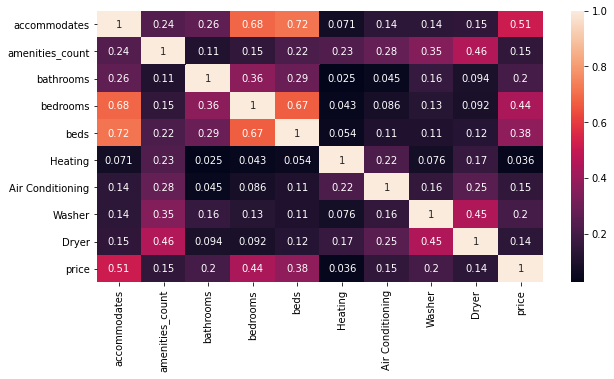

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot= True)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
y = listings_cleaned['price']
x = listings_cleaned.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state=1)

In [38]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from tensorflow.keras.utils import to_categorical

# Scale your data
from sklearn.preprocessing import StandardScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test) 

In [39]:
rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=1, 
                               max_features='auto',
                               )


In [40]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [41]:
print(rf.score(X_train_scaled, y_train))
print(rf.score(X_test_scaled, y_test))

0.9347479067969
0.537389109339371


In [50]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 61.915
R^2 test: 0.537


In [42]:
rf_features = pd.DataFrame()

rf_features['features'] = X_train.columns
rf_features['importance'] = rf.feature_importances_
rf_features.sort_values('importance', ascending=False).head(50)

,features,importance
4,room_typeid,0.247357
0,neighbourhoodid,0.126274
7,bathrooms,0.120353
6,amenities_count,0.093271
3,host_listings_count,0.067931
18,number_of_reviews,0.062224
5,accommodates,0.060632
19,review_scores_rating,0.041747
17,minimum_nights,0.034689
8,bedrooms,0.033252


In [61]:
rf_features_plot=rf_features.sort_values('importance', ascending=False).head(5)
rf_features_plot

,features,importance
4,room_typeid,0.247357
0,neighbourhoodid,0.126274
7,bathrooms,0.120353
6,amenities_count,0.093271
3,host_listings_count,0.067931


Text(0.5, 1.0, 'Random Forest Regressor - Feature Importance')

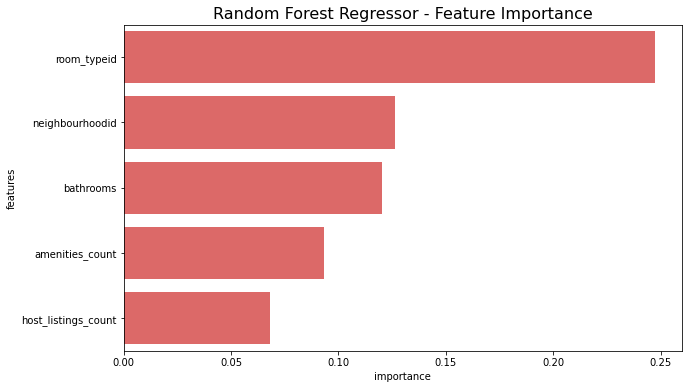

In [120]:
# make barplot and sort bars 
fig = plt.gcf()
fig.set_size_inches(10, 6)
rf_bar = sns.barplot(x='importance', y="features", data=rf_features_plot,  color= '#F05654', orient='h',
            order=rf_features_plot.features)
plt.title('Random Forest Regressor - Feature Importance', fontsize=16)

In [44]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently used:\n')
pprint(rf.get_params())

Parameters currently used:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [10, 20 ,40],
              'n_jobs':[3,4,5],
              'max_features': ['auto', 'sqrt', 'log2'],
              'n_estimators':[1000, 1500, 2000]}

grid = GridSearchCV(rf, param_grid, verbose=3)

In [ ]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] max_depth=10, max_features=auto, n_estimators=1000, n_jobs=3 ....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=auto, n_estimators=1000, n_jobs=3, score=0.512, total=  36.0s
[CV] max_depth=10, max_features=auto, n_estimators=1000, n_jobs=3 ....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.0s remaining:    0.0s


[CV]  max_depth=10, max_features=auto, n_estimators=1000, n_jobs=3, score=0.530, total=  34.4s
[CV] max_depth=10, max_features=auto, n_estimators=1000, n_jobs=3 ....


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV]  max_depth=10, max_features=auto, n_estimators=1000, n_jobs=3, score=0.523, total=  34.2s
[CV] max_depth=10, max_features=auto, n_estimators=1000, n_jobs=3 ....
[CV]  max_depth=10, max_features=auto, n_estimators=1000, n_jobs=3, score=0.495, total=  34.1s
[CV] max_depth=10, max_features=auto, n_estimators=1000, n_jobs=3 ....
[CV]  max_depth=10, max_features=auto, n_estimators=1000, n_jobs=3, score=0.518, total=  34.2s
[CV] max_depth=10, max_features=auto, n_estimators=1000, n_jobs=4 ....
[CV]  max_depth=10, max_features=auto, n_estimators=1000, n_jobs=4, score=0.512, total=  34.7s
[CV] max_depth=10, max_features=auto, n_estimators=1000, n_jobs=4 ....
[CV]  max_depth=10, max_features=auto, n_estimators=1000, n_jobs=4, score=0.530, total=  34.4s
[CV] max_depth=10, max_features=auto, n_estimators=1000, n_jobs=4 ....
[CV]  max_depth=10, max_features=auto, n_estimators=1000, n_jobs=4, score=0.523, total=  34.6s
[CV] max_depth=10, max_features=auto, n_estimators=1000, n_jobs=4 ....
[CV]

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 321.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=1000, n_jobs=3,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 1000, 'n_jobs': 3}
0.5365414378925228


In [82]:
from lightgbm import LGBMRegressor

y = listings_cleaned['price']
x = listings_cleaned.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state=1)

fit_params={
    "early_stopping_rounds":20, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', 
            'categorical_feature': 'auto'
           }

In [83]:
class LGBMRegressor_GainFE(LGBMRegressor):
    @property
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')

In [84]:
clf = LGBMRegressor_GainFE(num_leaves= 25, max_depth=20, 
                         random_state=0, 
                         silent=True, 
                         metric='rmse', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.01)
clf.fit(X_train.values, y_train.values, **fit_params)

Training until validation scores don't improve for 20 rounds.
[100]	valid's rmse: 70.7165
[200]	valid's rmse: 65.8181
[300]	valid's rmse: 63.7949
[400]	valid's rmse: 62.5476
[500]	valid's rmse: 61.7349
[600]	valid's rmse: 61.2356
[700]	valid's rmse: 60.9299
[800]	valid's rmse: 60.6961
[900]	valid's rmse: 60.4764
[1000]	valid's rmse: 60.2813
Did not meet early stopping. Best iteration is:
[1000]	valid's rmse: 60.2813


LGBMRegressor_GainFE(boosting_type='gbdt', class_weight=None,
                     colsample_bytree=0.9, importance_type='split',
                     learning_rate=0.01, max_depth=20, metric='rmse',
                     min_child_samples=20, min_child_weight=0.001,
                     min_split_gain=0.0, n_estimators=1000, n_jobs=4,
                     num_leaves=25, objective=None, random_state=0,
                     reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.9,
                     subsample_for_bin=200000, subsample_freq=0)

In [48]:
y_pred = clf.predict(X_test.values)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

R^2 test: 0.561


In [93]:
lgbm_features = pd.DataFrame()

lgbm_features['features'] = X_train.columns
lgbm_features['importance'] = clf.feature_importances_
lgbm_features.sort_values('importance', ascending=False).head(20)

,features,importance
4,room_typeid,1.903593e+09
7,bathrooms,8.734979e+08
0,neighbourhoodid,7.689908e+08
5,accommodates,5.562988e+08
8,bedrooms,3.205831e+08
3,host_listings_count,2.918084e+08
6,amenities_count,1.169029e+08
14,Washer,9.660086e+07
18,number_of_reviews,8.751856e+07
17,minimum_nights,8.541178e+07


In [94]:
lgbm_features=lgbm_features.sort_values('importance', ascending=False).head(5)
lgbm_features

,features,importance
4,room_typeid,1.903593e+09
7,bathrooms,8.734979e+08
0,neighbourhoodid,7.689908e+08
5,accommodates,5.562988e+08
8,bedrooms,3.205831e+08


Text(0.5, 1.0, 'LGBM Regressor - Feature Importance')

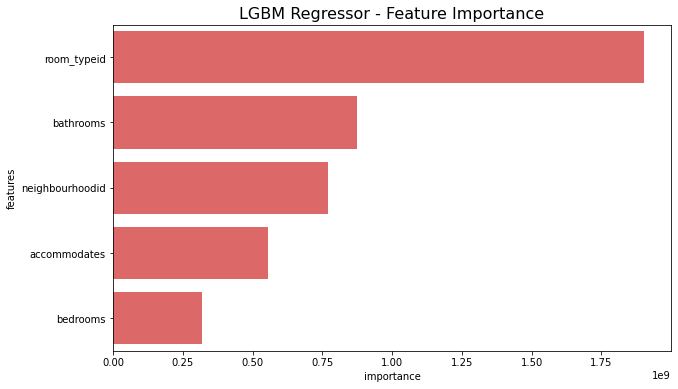

In [119]:
# make barplot and sort bars 
fig = plt.gcf()
fig.set_size_inches(10, 6)
sns.barplot(x='importance', 
            y="features", data=lgbm_features,  color= '#F05654', orient='h',
            order=lgbm_features.features)
plt.title('LGBM Regressor - Feature Importance', fontsize=16)